In [7]:
import matplotlib
import pylab as pl
import networkx as nx
from random import *


def initialize():
    global g
    g = nx.watts_strogatz_graph(node,edge,0.1)
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if random() < p_i else 0

def observe():
    global g
    pl.cla()
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)
    pl.show()

p_i = 0.5 # infection probability
p_r = 0.5 # recovery probability

def update():
    global g
    new_state =[]

    for a in list(g.nodes):
        state = g.nodes[a]['state']
        if g.nodes[a]['state'] == 0: # if susceptible
            b = rd.choice(list(g.neighbors(a)))
            if g.nodes[b]['state'] == 1: # if neighbor b is infected
                state = 1 if random() < p_i else 0

        else: # if infected
            state = 0 if random() < p_r else 1
        new_state.append(state)

    for i in range(len(list(g.nodes))):
        g.nodes[i]['state'] = new_state[i]
            
        

0.027


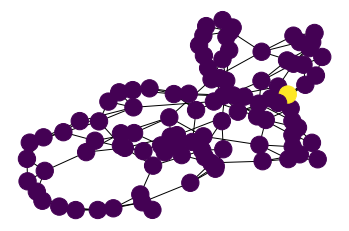

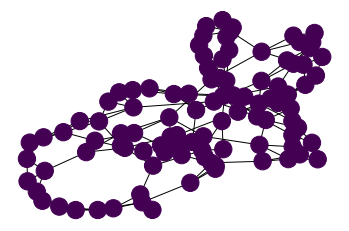

In [37]:

# p_e = 0.3 #prob of being connected
p_i = 0.008 #prob of infected
node = 100
edge = 4
p_r= p_i*edge - 0.005  #<k>
print(p_r)

initialize()
observe()
for _ in range(200):
    update()
observe()

* One of the differences is that synchroneous rules update all nodes on the same setting while asynchroneous rules update one node at a time, meaning a node would be updated on different settings in 2 rules
* Synchroneous rule is used in the mean field approximation because we are assuming the same possibility formulae on all nodes, meaning they are at the same setting when updated